## Statistical Modeling, Part 1: Linear Regression

In this exercise, you'll get a chance to practice building and analyzing linear models using the data from the UN exercise.

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

You'll be working with the combined gdp and life expectancy data.

In [2]:
gdp_le = pd.read_csv('../data/gdp_le.csv').dropna()

In [3]:
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
1,Afghanistan,2018,2033.779002,Asia,64.486
2,Afghanistan,2017,2058.383832,Asia,64.130
3,Afghanistan,2016,2057.062164,Asia,63.763
4,Afghanistan,2015,2068.265904,Asia,63.377
...,...,...,...,...,...
5109,Zimbabwe,1994,3263.934978,Africa,52.044
5110,Zimbabwe,1993,3033.504852,Africa,53.653
5111,Zimbabwe,1992,3054.889178,Africa,55.243
5112,Zimbabwe,1991,3426.598094,Africa,56.749


### Part 1: Analyzing 2019

For this part, we'll look at our dataset just for the year 2019.

In [4]:
gdp_le_2019 = gdp_le[gdp_le['Year'] == 2019].copy()

Fit a linear regression model on the 2019 data with target variable life expenctancy and predictor variable GDP per capita.

In [5]:
lm = smf.ols('Life_Expectancy ~ GDP_Per_Capita', data = gdp_le_2019).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     166.8
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           8.13e-27
Time:                        20:41:11   Log-Likelihood:                -513.64
No. Observations:                 167   AIC:                             1031.
Df Residuals:                     165   BIC:                             1038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         67.9940      0.566    120.197      0.000      66.877      69.111
GDP_Per_Capita     0.0002   1.79e-05     12.915      0.000       0.000       0.000
==============================================================================
Omnibus:                       20.455   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.319
Skew:                          -0.923   Prob(JB):                     5.24e-06
Kurtosis:                       3.295   Cond. No.                     4.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Question:** How can we interpret the meaning of the coefficient for GDP_Per_Capita?

**ANSWER:**
For every $ increase in GDP per cap, there is a .0002 increase in life expectancy years.

It might make it easier to interpret if we changed the units on GDP_Per_Capita since a one unit change in GDP per capita does not have a very large impact at all on GDP_Per_Capita.

Fit a new model, but this time use thousands of dollars of GDP_Per_Capita as your predictor variable.

**Hint:** Two ways that you can accomplish this are by creating a new column in your DataFrame or by making use of `I()` in your formula.

In [6]:
lm = smf.ols('Life_Expectancy ~ I(GDP_Per_Capita/1000)', data = gdp_le_2019).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     166.8
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           8.13e-27
Time:                        20:41:11   Log-Likelihood:                -513.64
No. Observations:                 167   AIC:                             1031.
Df Residuals:                     165   BIC:                             1038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   67.9940      0.566    120.197      0.000      66.877      69.111
I(GDP_Per_Capita / 1000)     0.2307      0.018     12.915      0.000       0.195       0.266
==============================================================================
Omnibus:                       20.455   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.319
Skew:                          -0.923   Prob(JB):                     5.24e-06
Kurtosis:                       3.295   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Questions:** How do we interpret the meaning of the coefficients for the new model?

**ANSWER:**
For every $1k increase in GDP per cap, mean life expectancy increases by 0.23 years.

Now, let's plot the fitted values against the original data.

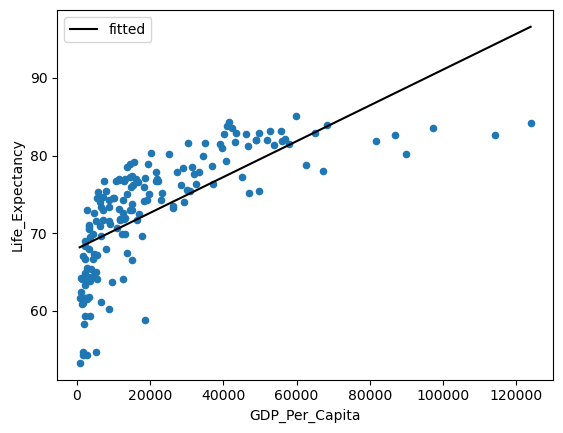

In [7]:
ax = gdp_le_2019.plot(x = 'GDP_Per_Capita', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2019['GDP_Per_Capita'].min(),
        stop = gdp_le_2019['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'GDP_Per_Capita', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

**Question:** What potential problems do you see with this fit?

**ANSWER:**
regression line does not fit data

You saw from the guided exploration portion of the project that using the logarithm of the GDP resulted in a larger correlation value. 

Fit a new model using the log of GDP Per Capita as a predictor variable.

**Hint:** You can do this by using `'Life_Expectancy ~ np.log(GDP_Per_Capita)'` as your formula.

In [8]:
lm = smf.ols('Life_Expectancy ~ np.log(GDP_Per_Capita)', data = gdp_le_2019).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     424.2
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           1.82e-47
Time:                        20:41:11   Log-Likelihood:                -465.69
No. Observations:                 167   AIC:                             935.4
Df Residuals:                     165   BIC:                             941.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 21.7086      2.512      8.643      0.000      16.749      26.668
np.log(GDP_Per_Capita)     5.4472      0.264     20.596      0.000       4.925       5.969
==============================================================================
Omnibus:                       33.242   Durbin-Watson:                   2.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.032
Skew:                          -1.028   Prob(JB):                     3.05e-12
Kurtosis:                       4.843   Cond. No.                         78.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

mean(life expectancy)= 21.708+5.4472*log(GDP_per_capita)

**Difficult Question:** How do we interpret the meaning of the coefficient for log(GDP_Per_Capita)?

**Difficult Answer:**
For every 1 unit increase in log of GDP per cap, life expectancy increases by 5.4472 years
To increase the natural log by 1, multiply by e(2.718ish)

Let's look at the plot of our fitted vales agains the data.

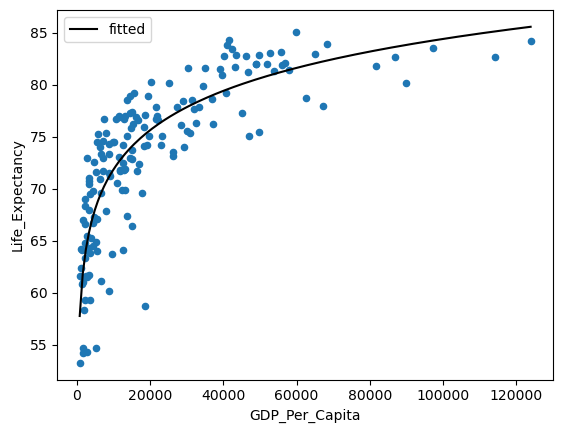

In [9]:
ax = gdp_le_2019.plot(x = 'GDP_Per_Capita', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2019['GDP_Per_Capita'].min(),
        stop = gdp_le_2019['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'GDP_Per_Capita', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

We can also look on the log scale.

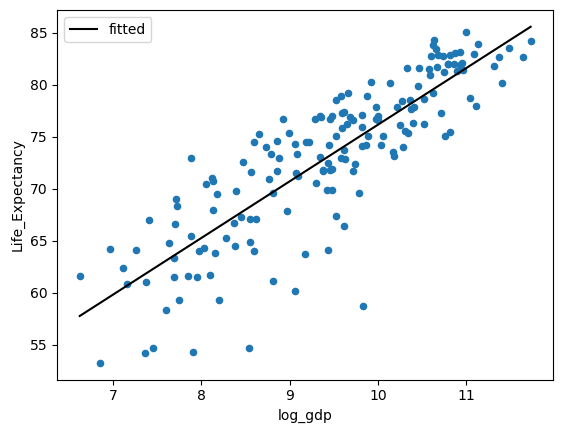

In [10]:
gdp_le_2019['log_gdp'] = np.log(gdp_le_2019['GDP_Per_Capita'])

ax = gdp_le_2019.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2019['GDP_Per_Capita'].min(),
        stop = gdp_le_2019['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'log_gdp', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

## Part 2: Life Expectancy Over Time

Now, let's explore the relationship between health and wealth over time.

First, using all data in gdp_le, fit a model for life expectancy based on number of years since 1990. (Hint: make use of I()) to help with this.

In [11]:
lm = smf.ols('Life_Expectancy ~ I(Year-1990)', data = gdp_le).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     358.7
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           2.86e-77
Time:                        20:41:11   Log-Likelihood:                -17994.
No. Observations:                4922   AIC:                         3.599e+04
Df Residuals:                    4920   BIC:                         3.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.4573      0.267    241.860      0.000      63.935      64.980
I(Year - 1990)     0.2953      0.016     18.939      0.000       0.265       0.326
==============================================================================
Omnibus:                      443.591   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              574.393
Skew:                          -0.837   Prob(JB):                    1.87e-125
Kurtosis:                       3.004   Cond. No.                         34.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** How can you interpret the meaning of both of the coefficients of this model?

**ANSWER:**
 The mean life expectancy is 64.45 years in 1990 and for each addtional year since 1990, the mean life expectancy increases by .295 years

We can compare the fit model to the data.

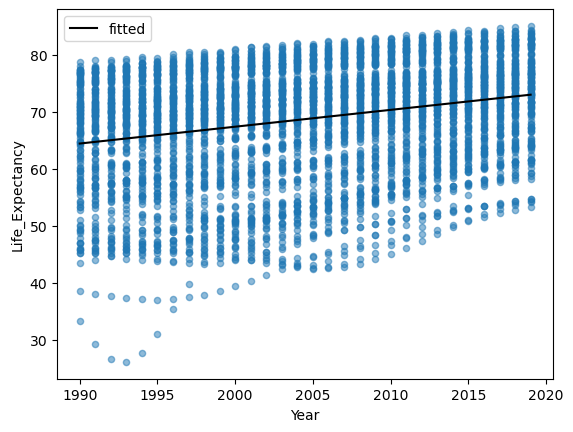

In [12]:
ax = gdp_le.plot(kind = 'scatter', x = 'Year', y = 'Life_Expectancy', alpha = 0.5)

fit_df = pd.DataFrame({
    'Year': np.linspace(
        start = gdp_le['Year'].min(),
        stop = gdp_le['Year'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'Year', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

Perhaps we could do better if we include continent in our model. Fit a model which includes a term for Continent. (Don't include any interactions yet).

In [13]:
lm_continent = smf.ols('Life_Expectancy ~ I(Year-1990) + Continent', data = gdp_le).fit()
lm_continent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1332.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:41:11   Log-Likelihood:                -15791.
No. Observations:                4922   AIC:                         3.160e+04
Df Residuals:                    4915   BIC:                         3.164e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     53.0815      0.221    239.892      0.000      52.648      53.515
Continent[T.Asia]             13.2758      0.244     54.437      0.000      12.798      13.754
Continent[T.Europe]           18.6185      0.238     78.315      0.000      18.152      19.085
Continent[T.North America]    15.9228      0.287     55.560      0.000      15.361      16.485
Continent[T.Oceania]          12.4150      0.398     31.195      0.000      11.635      13.195
Continent[T.South America]    14.5785      0.369     39.507      0.000      13.855      15.302
I(Year - 1990)                 0.2883      0.010     28.901      0.000       0.269       0.308
==============================================================================
Omnibus:                       68.182   Durbin-Watson:                   0.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.460
Skew:                           0.154   Prob(JB):                     1.53e-22
Kurtosis:                       3.629   Cond. No.                         98.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Questions:**

1. Is including a term for continent statistically significant?
2. How do you interpret the meaning of the model coefficients?
3. What does the model say about European vs. Asian vs. African countries with respect to life expectancy in 1990 and the increase over time of life expectancy?

**ANSWER:**
    1. The continent term is significant looking at p values and also ANOVA
    2.& 3.  For African countries, mean life expectancy= 53.081+.2883(year-1990)
        For Asian countries, mean le=53.081 + 13.275 + 0.2883(year-1990)
        For European countries, mean le= 53.081 + 18.618 + 0.2883(year-1990)

In [14]:
sm.stats.anova_lm(lm, lm_continent)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,4920.0,431569.848950,0.0,NaN,NaN,NaN
1,4915.0,176355.860946,5.0,255213.988004,1422.551816,0.0


Adjust the `continent` variable below to see the fitted vs. actual values by continent. What do you notice?

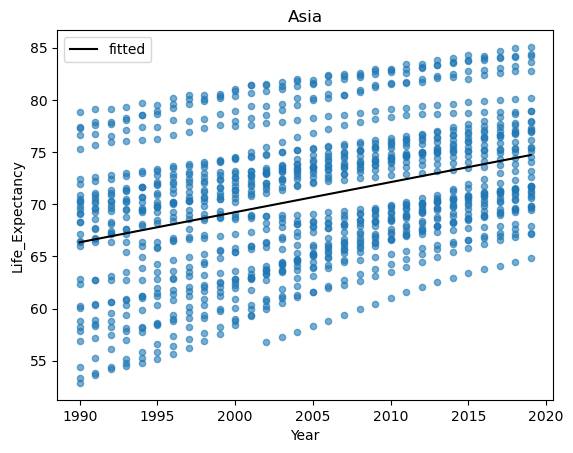

In [21]:
continent = 'Asia'

sub_df = gdp_le[gdp_le['Continent'] == continent]

ax = sub_df.plot(x = 'Year', 
                 y = 'Life_Expectancy',
                 kind = 'scatter',
                 title = continent,
                 alpha = 0.6)

fit_df = pd.DataFrame({
    'Year': np.linspace(start = sub_df['Year'].min(),
                                  stop = sub_df['Year'].max()
                                 ),
    'Continent': continent
})
fit_df['fitted'] = lm_continent.predict(fit_df)
fit_df.plot(x = 'Year', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

Now, add an interaction term between Continent and Year to your model.

In [16]:
lm_continent_int = smf.ols('Life_Expectancy ~ I(Year-1990) + Continent +(I(Year-1990)):Continent', data = gdp_le).fit()
lm_continent_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     743.8
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:41:12   Log-Likelihood:                -15753.
No. Observations:                4922   AIC:                         3.153e+04
Df Residuals:                    4910   BIC:                         3.161e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    51.1577      0.325    157.566      0.000      50.521      51.794
Continent[T.Asia]                            15.1446      0.484     31.273      0.000      14.195      16.094
Continent[T.Europe]                          21.7611      0.474     45.911      0.000      20.832      22.690
Continent[T.North America]                   19.0486      0.559     34.054      0.000      17.952      20.145
Continent[T.Oceania]                         15.4019      0.773     19.913      0.000      13.886      16.918
Continent[T.South America]                   16.7370      0.716     23.360      0.000      15.332      18.142
I(Year - 1990)                                0.4191      0.019     22.019      0.000       0.382       0.456
I(Year - 1990):Continent[T.Asia]             -0.1271      0.028     -4.499      0.000      -0.182      -0.072
I(Year - 1990):Continent[T.Europe]           -0.2119      0.028     -7.670      0.000      -0.266      -0.158
I(Year - 1990):Continent[T.North America]    -0.2135      0.033     -6.468      0.000      -0.278      -0.149
I(Year - 1990):Continent[T.Oceania]          -0.2044      0.046     -4.455      0.000      -0.294      -0.114
I(Year - 1990):Continent[T.South America]    -0.1470      0.042     -3.471      0.001      -0.230      -0.064
==============================================================================
Omnibus:                       89.492   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.415
Skew:                           0.210   Prob(JB):                     1.30e-28
Kurtosis:                       3.671   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Questions:** 
1. Are the interaction terms statistically significant?
2. What does the model say about European vs. Asian vs. African countries with respect to life expectancy in 1990 and the increase over time of life expectancy?

**ANSWERS:**
    1)Yes
    2)For Africa, mean life expectancy = 51.1577 + 0.4191*(Year-1990)
        For Asia, mean le = 51.1577 + 15.1446 + (0.4191-0.1271)*(Year-1990)

In [35]:
sm.stats.anova_lm(lm, lm_continent_int)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,4920.0,431569.84895,0.0,NaN,NaN,NaN
1,4910.0,173655.42108,10.0,257914.42787,729.237148,0.0


You can uses the code in the next cell to explore the output from the new model.

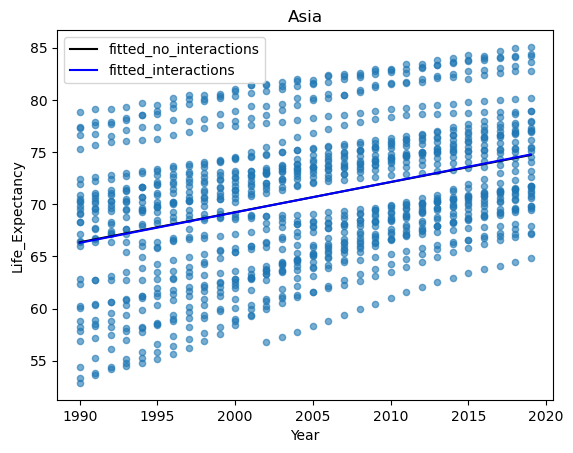

In [18]:
continent = 'Asia'

sub_df = gdp_le[gdp_le['Continent'] == continent]

ax = sub_df.plot(x = 'Year', 
                 y = 'Life_Expectancy',
                 kind = 'scatter',
                 title = continent,
                 alpha = 0.6)

fit_df = pd.DataFrame({
    'Year': np.linspace(start = sub_df['Year'].min(),
                        stop = sub_df['Year'].max()
                       ),
    'Continent': continent
})
fit_df['fitted_no_interactions'] = lm_continent.predict(fit_df)
fit_df['fitted_interactions'] = lm_continent_int.predict(fit_df)
fit_df.plot(x = 'Year', y = 'fitted_no_interactions', ax = ax, color = 'black', label = 'fitted_no_interactions')
fit_df.plot(x = 'Year', y = 'fitted_interactions', ax = ax, color = 'blue', label = 'fitted_interactions');

## Part 3: The Effect of Wealth on Health

Now, let's try and uncover the effect of wealth on health, after accounting for the effect of Continent and year.

Fit a model that builds off of your previous model but includes a term for the log of gdp per capita.

In [33]:
gdp_le['log_gdp'] = np.log(gdp_le['GDP_Per_Capita'])

In [30]:
lm_gdp = smf.ols('Life_Expectancy ~ I(Year-1990) + Continent + log_gdp + (I(Year-1990)):Continent', data = gdp_le).fit()
lm_gdp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1707.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:02:37   Log-Likelihood:                -14122.
No. Observations:                4922   AIC:                         2.827e+04
Df Residuals:                    4909   BIC:                         2.836e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    16.7209      0.558     29.969      0.000      15.627      17.815
Continent[T.Asia]                            10.5321      0.354     29.728      0.000       9.838      11.227
Continent[T.Europe]                          12.6167      0.366     34.474      0.000      11.899      13.334
Continent[T.North America]                   12.2699      0.414     29.649      0.000      11.459      13.081
Continent[T.Oceania]                         11.3964      0.558     20.406      0.000      10.302      12.491
Continent[T.South America]                   10.9321      0.522     20.963      0.000       9.910      11.954
I(Year - 1990)                                0.3245      0.014     23.622      0.000       0.298       0.351
I(Year - 1990):Continent[T.Asia]             -0.1627      0.020     -8.016      0.000      -0.202      -0.123
I(Year - 1990):Continent[T.Europe]           -0.2124      0.020    -10.709      0.000      -0.251      -0.174
I(Year - 1990):Continent[T.North America]    -0.2041      0.024     -8.612      0.000      -0.251      -0.158
I(Year - 1990):Continent[T.Oceania]          -0.1610      0.033     -4.887      0.000      -0.226      -0.096
I(Year - 1990):Continent[T.South America]    -0.1507      0.030     -4.957      0.000      -0.210      -0.091
log_gdp                                       4.4641      0.066     67.934      0.000       4.335       4.593
==============================================================================
Omnibus:                      282.819   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              803.831
Skew:                          -0.288   Prob(JB):                    2.82e-175
Kurtosis:                       4.894   Cond. No.                         228.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** How do we interpret the coefficient of log(gdp)?

The resulting model looks at gdp vs. life expectancy by continent. You can explore how the fitted values compare to the actual values by adjusting the values for year and continent below.

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'log_gdp' is not defined
    Life_Expectancy ~ I(Year-1990) + Continent + log_gdp + (I(Year-1990)):Continent
                                                 ^^^^^^^

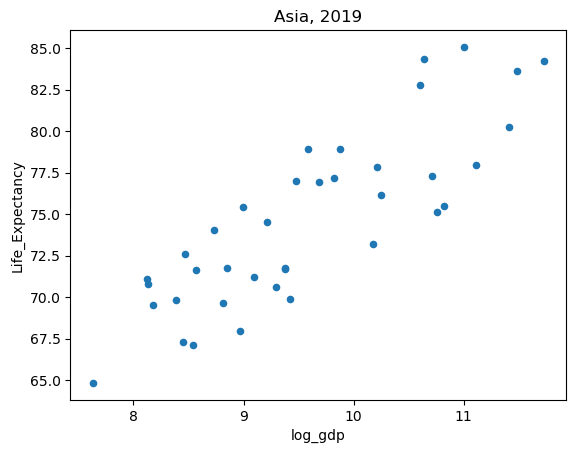

In [31]:
year = 2019
continent = 'Asia'

sub_df = gdp_le[(gdp_le['Year'] == year) & (gdp_le['Continent'] == continent)]

ax = sub_df.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter', title = f'{continent}, {year}')

fit_df = pd.DataFrame({
    'Year': year,
    'Continent': continent,
    'GDP_Per_Capita': np.linspace(start = sub_df['GDP_Per_Capita'].min(),
                                  stop = sub_df['GDP_Per_Capita'].max()
                                 )
})
fit_df['fitted'] = lm_gdp.predict(fit_df)
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df.plot(x = 'log_gdp', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

Perhaps we could estimate different effects of gdp per continent. Add an interaction term between continent and gdp.

In [ ]:
lm_gdp_cont = #Your Code Here
lm_gdp_cont.summary()

**Questions:** 
1. Are the new interaction terms statistically significant?
2. What does the model say about European vs. Asian vs. African countries with respect to the effect of gdp on life expectancy?

In [ ]:
# Fill in the code to check if the interaction term is significant

In [ ]:
year = 2007
continent = 'Africa'

sub_df = gdp_le[(gdp_le['Year'] == year) & (gdp_le['Continent'] == continent)]

ax = sub_df.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter', title = continent)

fit_df = pd.DataFrame({
    'Year': year,
    'Continent': continent,
    'GDP_Per_Capita': np.linspace(start = sub_df['GDP_Per_Capita'].min(),
                                  stop = sub_df['GDP_Per_Capita'].max()
                                 )
})
fit_df['fitted_no_interactions'] = lm_gdp.predict(fit_df)
fit_df['fitted_interactions'] = lm_gdp_cont.predict(fit_df)
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df.plot(x = 'log_gdp', y = 'fitted_no_interactions', ax = ax, color = 'black', label = 'fitted_no_interactions');
fit_df.plot(x = 'log_gdp', y = 'fitted_interactions', ax = ax, color = 'blue', label = 'fitted_interactions');

Finally, add an interaction term between log(gdp) and year.

In [ ]:
lm_gdp_cont_year = smf.ols('Life_Expectancy ~ I(Year - 1990) + Continent + Continent:(I(Year - 1990) + np.log(GDP_Per_Capita)) + np.log(GDP_Per_Capita) + np.log(GDP_Per_Capita):I(Year - 1990)', data = gdp_le).fit()
lm_gdp_cont_year.summary()

**Question:** How do we interpret the new interaction term?

In [ ]:
year = 2015
continent = 'Asia'

sub_df = gdp_le[(gdp_le['Year'] == year) & (gdp_le['Continent'] == continent)]

ax = sub_df.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter', title = continent)

fit_df = pd.DataFrame({
    'Year': year,
    'Continent': continent,
    'GDP_Per_Capita': np.linspace(start = sub_df['GDP_Per_Capita'].min(),
                                  stop = sub_df['GDP_Per_Capita'].max()
                                 )
})
fit_df['year_interaction'] = lm_gdp_cont_year.predict(fit_df)
fit_df['no_year_interaction'] = lm_gdp_cont.predict(fit_df)
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df.plot(x = 'log_gdp', y = 'no_year_interaction', ax = ax, color = 'black', label = 'no_year_interaction');
fit_df.plot(x = 'log_gdp', y = 'year_interaction', ax = ax, color = 'blue', label = 'year_interaction');